In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
class Visualizer():
    def __init__(self, func, x1, x2, step):
        self.func = func
        self.x1, self.x2 = np.meshgrid(np.arange(x1[0], x1[1], step), np.arange(x2[0], x2[1], step))
        self.step = step
        self.z = self.func(self.x1, self.x2)
    
    def canvas(self):
        fig = plt.figure(figsize = (8, 6))
        ax = fig.add_subplot(projection='3d', elev=50, azim=50)
        ax.plot_surface(self.x1, self.x2, self.z, norm=LogNorm(), rstride=1, cstride=1, 
                        alpha=.8, cmap=plt.cm.jet)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')
        plt.show()
    
    def gradient_decent(self, start_point, jacobian):
        max_count = 1000
        epsilon = 0.001
        gamma = 0.01
        x1_array = [start_point[0]]
        x2_array = [start_point[1]]
        error = 100
        step = 0
        while error > epsilon and step < max_count:
            step += 1
            direction = jacobian(x1_array[-1], x2_array[-1])
            x1 = x1_array[-1] - gamma * direction[0]
            x2 = x2_array[-1] - gamma * direction[1]
            error = np.linalg.norm([x1 - x1_array[-1], x2 - x2_array[-1]])
            x1_array.append(x1)
            x2_array.append(x2)
        return x1_array, x2_array, step
    
    def newton_method(self, start_point, hessian, jacobian):
        max_count = 1000
        epsilon = 0.001
        x1_array = [start_point[0]]
        x2_array = [start_point[1]]
        error = 100
        step = 0
        while error > epsilon and step < max_count:
            step += 1
            p = -np.dot(np.linalg.inv(hessian(x1_array[-1], x2_array[-1])), jacobian(x1_array[-1], x2_array[-1]))
            x1, x2 = x1_array[-1] + p[0], x2_array[-1] + p[1]
            error = np.linalg.norm([x1 - x1_array[-1], x2 - x2_array[-1]])
            x1_array.append(x1)
            x2_array.append(x2)
        return x1_array, x2_array, step
    
    def descent_plot(self, x1, x2):
        anglesx1 = x1[1:] - x1[:-1]
        anglesx2 = x2[1:] - x2[:-1]
        
        fig = plt.figure(figsize = (16, 6))
        ax = fig.add_subplot(1, 2, 1, projection='3d', elev=50, azim=50)
        ax.plot_surface(self.x1, self.x2, self.z, norm=LogNorm(), rstride=1, cstride=1, 
                        alpha=0.4, cmap=plt.cm.jet)
        ax.plot(x1, x2, self.func(x1, x2), color = 'r', marker = '*')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')
        
        ax = fig.add_subplot(1, 2, 2)
        ax.contour(self.x1, self.x2, self.z, 50, cmap=plt.cm.jet)
        ax.scatter(x1, x2, color = 'r', marker = '*')
        ax.quiver(x1[:-1], x2[:-1], anglesx1, anglesx2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'k')
        plt.show()
        
    
    
        
    

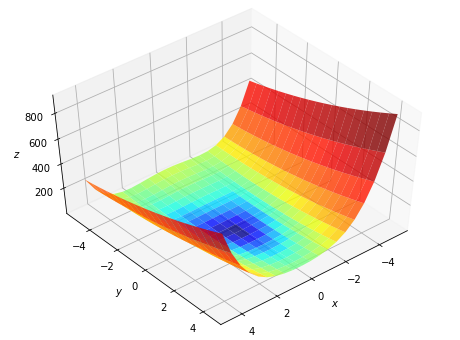

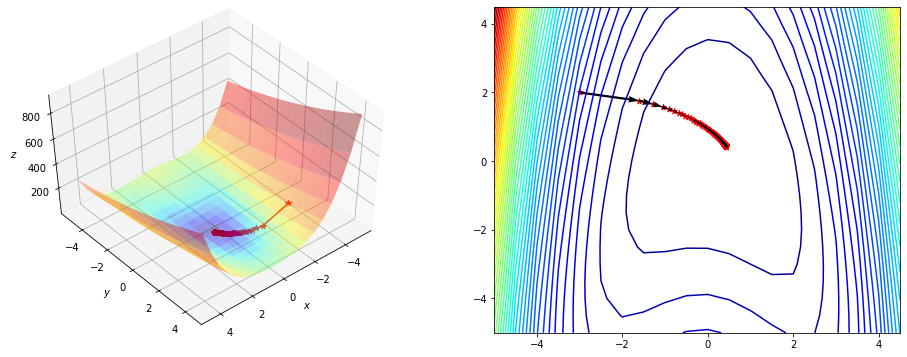

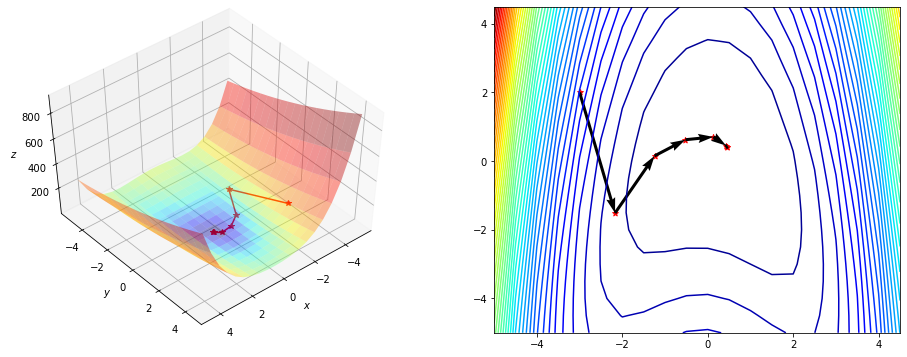

120 7 0.4372004170088627 0.4248989148965501 0.45339766735519804 0.39721541562264345


In [4]:
def f1(x, y):
    return (x**2 + y)**2 + (x - 1)**2 + (y - 1)**2

def jacobian(x, y):
    #return np.array([2*x+0.9*3.14*np.sin(3*3.14*x), 4*y+1.6*3.14*np.sin(4*3.14*y)])
    return np.array([4*x**3+4*x*y+2*x-2, 2*x**2+4*y-2])

def hessian(x, y):
    #return np.array([[2+2.7*3.14**2*np.cos(3*3.14*x), 0],[0, 4+6.4*3.14**2*np.cos(4*3.14*y)]])
    return np.array([[12*x**2+4*y+2, 4*x],[4*x, 4]])

x1 = [-5., 5.]
x2 = [-5., 5.]
step = 0.5
vis = Visualizer(f1, x1, x2, step)
vis.canvas()
x11, x12, step1 = vis.gradient_decent([-3., 2.], jacobian)
x21, x22, step2 = vis.newton_method([-3., 2.], hessian, jacobian)
vis.descent_plot(np.array(x11), np.array(x12))
vis.descent_plot(np.array(x21), np.array(x22))
print(step1, step2, x11[-1], x12[-1], x21[-1], x22[-1])